# Flower Classification(CNN)

<img src='https://www.acarcicek.com/Upload/cicek-anlamlari.jpg'>

The images are divided into five classes: chamomile, tulip, rose, sunflower, dandelion. For each class, there are approximately 800 photos. The photos are not in high resolution, approximately 320×240 pixels. Photos are not reduced to one size, they have different proportions.

Bu projede derin öğrenme(cnn) ve transfer learning ile çiçek sınıfladırma modeli oluşturacağım.

## Kütüphaneler - Libraries

In [3]:
import cv2 # Resimleri okur.Ve işlem yapmamızı kolaylaştırıır.+
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Veriyi ikiye ayırıyor

from keras.models import Sequential # Keras Kütüphanesi deep learning yapmamızı sağlıyor.
from keras.layers import Conv2D,Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.callbacks import EarlyStopping
import os 

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') # Uyarıları engelliyor.

In [4]:
labels = ['daisy', 'dandelion', 'rose','sunflower','tulip']
img_path='flowers/'

In [5]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+"/"+img_file)
        label_list.append(label)
df=pd.DataFrame({'img':img_list,'label':label_list})

In [6]:
df.head()

,img,label
0,flowers/daisy/100080576_f52e8ee070_n.jpg,daisy
1,flowers/daisy/10140303196_b88d3d6cec.jpg,daisy
2,flowers/daisy/10172379554_b296050f82_n.jpg,daisy
3,flowers/daisy/10172567486_2748826a8b.jpg,daisy
4,flowers/daisy/10172636503_21bededa75_n.jpg,daisy


In [7]:
df.shape

(4317, 2)

In [8]:
df.sample()

,img,label
130,flowers/daisy/16121105382_b96251e506_m.jpg,daisy


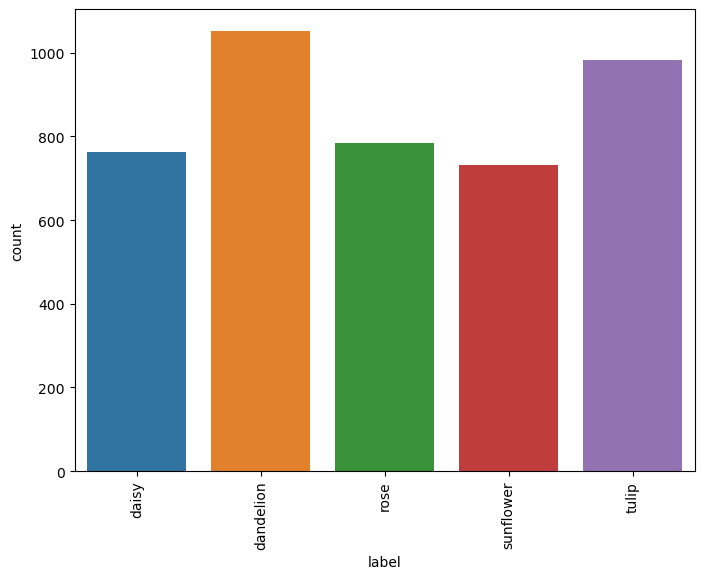

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['label'],hue=df['label'])
plt.xticks(rotation=90);

In [11]:
classes = sorted(df['label'].unique())
mapping = {cls: i for i, cls in enumerate(classes)}
df['label_encoded'] = df['label'].map(mapping)

Sınıf isimlerini bir numaraya atadık.

In [12]:
df['label_encoded'] = df['label'].map(mapping)

## Modelling

## CNN (Deep Learning)

In [13]:
x=[] # bos liste
for img in df['img']:
    img=cv2.imread(str(img))
    img=cv2.resize(img,(170,170))
    img=img/255.0 # normalize et
    x.append(img)

In [14]:
x=np.array(x)

In [15]:
x.shape

(4317, 170, 170, 3)

In [16]:
y=df['label_encoded']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.20) 

In [18]:
model=Sequential()
model.add(Input(shape=(170, 170, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# Added activation function
model.add(Dense(5, activation='softmax'))  # Ensure 5 classes for softmax

# Compile the model
model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 
# aşırı Öğrenmeyi engeller.

In [20]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=20, verbose=1, callbacks=[early])

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 218ms/step - accuracy: 0.4228 - loss: 1.3768 - val_accuracy: 0.5694 - val_loss: 1.1277
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - accuracy: 0.5589 - loss: 1.0871 - val_accuracy: 0.5868 - val_loss: 1.0225
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 217ms/step - accuracy: 0.6629 - loss: 0.8793 - val_accuracy: 0.6308 - val_loss: 1.0374
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - accuracy: 0.7929 - loss: 0.5858 - val_accuracy: 0.6250 - val_loss: 1.0648
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 213ms/step - accuracy: 0.8830 - loss: 0.3463 - val_accuracy: 0.6076 - val_loss: 1.2322
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - accuracy: 0.9345 - loss: 0.1907 - val_accuracy: 0.6262 - val_loss: 1.6835
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - accuracy: 0.9583 - loss: 0.1316 - val_accuracy: 0.6215 - val_loss: 1.7387


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 168, 168, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 84, 84, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 82, 82, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 41, 41, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107584)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      13,770,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,396,561 (157.92 MB)

 Trainable params: 13,798,853 (52.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,597,708 (105.28 MB)

## Görselleştirme - Data Visulation

In [22]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step 


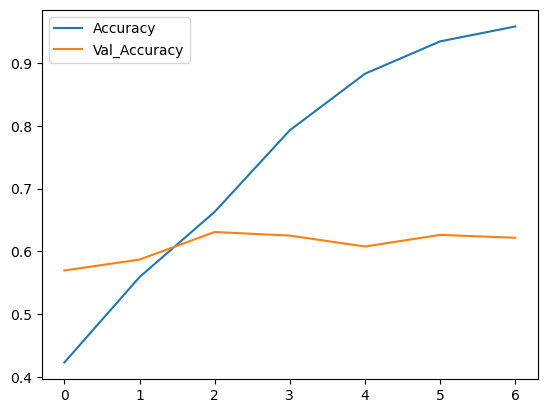

In [23]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

In [24]:
cm = confusion_matrix(y_test, y_pred_classes)

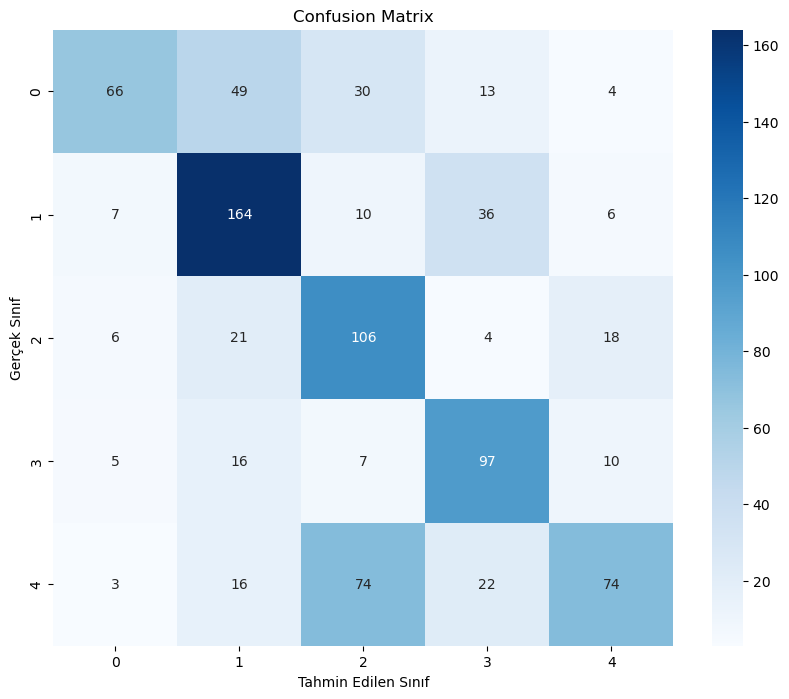

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')    
plt.ylabel('Gerçek Sınıf') 
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Modeli Kaydetme

In [26]:
model.save('flower_cfic_cnn.h5')

## Transfer Learning

In [29]:
from tensorflow.keras.applications import VGG16, ResNet50, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
data_dir='flowers'
img_width,img_heigth=224,224
train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='training')
test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='validation')
# eğitim ve test veri setini oluşturuyoruz.

base_model=Xception(weights='imagenet', input_shape=(img_width,img_heigth,3), include_top=False)

model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(5,activation='softmax')) # softmax coklu sınıflandırmada kullanılır.

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.7576 - loss: 4.3958 - val_accuracy: 0.8395 - val_loss: 0.5661
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9265 - loss: 0.2333 - val_accuracy: 0.8512 - val_loss: 0.5425
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9728 - loss: 0.0873 - val_accuracy: 0.8802 - val_loss: 0.4927
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.9879 - loss: 0.0445 - val_accuracy: 0.8453 - val_loss: 0.6792
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9902 - loss: 0.0355 - val_accuracy: 0.8453 - val_loss: 0.6667
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9800 - loss: 0.0553 - val_accuracy: 0.8488 - val_loss: 0.7415
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.9714 - loss: 0.0973 - val_accuracy: 0.8721 - val_loss: 0.6552
Epoch 8/10
109

In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329,161,273 (1.23 GB)

 Trainable params: 102,766,597 (392.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 205,533,196 (784.05 MB)

In [39]:
# modeli kaydediyoruz

In [40]:
model.save('flowers-TL-C1.h5')

## Sonuç - Conclusion

Bu projede cnn(deep learning) ve transfer learning ile çiçek sınıflandırma modeli oluşturdum ve kaydettim.Başarı Oranlarım(accuracy score) sırasıyla % 95 (cnn), % 90 (tf) çıktı.